Prathamesh Ingale

## Aim:
Implementation of Bagging Algorithm: Random Forest

## Theory

### Random Forest 

Random Forest is an ensemble learning algorithm that combines the predictions of multiple decision trees to make more accurate and robust predictions. It belongs to the family of bagging algorithms.

The algorithm creates an ensemble of decision trees, where each tree is trained on a random subset of the original dataset, known as bootstrap samples. These bootstrap samples are created by randomly selecting data points with replacement from the original dataset.

At each node of a decision tree, instead of considering all features, a random subset of features is considered for splitting. This process helps to introduce randomness and reduce the correlation among individual trees, making the forest more diverse and less prone to overfitting.

The decision trees in the random forest are grown until a stopping criterion is met, such as reaching a maximum depth or a minimum number of samples at a leaf node. This ensures that the trees do not become too complex or overfit to the training data.

During the prediction phase, each tree in the random forest independently predicts the class (for classification) or value (for regression) of a new data point. The final prediction is determined by aggregating the predictions of all the trees, usually by majority voting for classification or averaging for regression.

Random Forest algorithm offers several benefits, including high accuracy, robustness against overfitting, and the ability to handle large datasets with high-dimensional features. It is widely used in various domains, such as finance, healthcare, and image recognition, for tasks like classification, regression, and feature selection.

#### Working of Random Forest:
Random Forest works in two-phase first is to create the random forest by combining N decision trees, and second is to make predictions for each tree created in the first phase.

 - Step-1: Select random K data points from the training set.
 - Step-2: Build the decision trees associated with the selected data points (Subsets).
 - Step-3: Choose the number N for decision trees that you want to build.
 - Step-4: Repeat Step 1 & 2
 - Step-5: For new data points, find the predictions of each decision tree, and assign the new data points to the category that wins the majority votes.

In [3]:
import numpy as prathamesh_np
import pandas as prathamesh_pd
import matplotlib.pyplot as prathamesh_plt

from sklearn.metrics import accuracy_score

In [4]:
prathamesh_ds = prathamesh_pd.read_csv('pulsar_data_train.csv')

In [5]:
prathamesh_ds=prathamesh_ds.dropna()
prathamesh_ds.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [6]:
prathamesh_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9273 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                9273 non-null   float64
 1    Standard deviation of the integrated profile  9273 non-null   float64
 2    Excess kurtosis of the integrated profile     9273 non-null   float64
 3    Skewness of the integrated profile            9273 non-null   float64
 4    Mean of the DM-SNR curve                      9273 non-null   float64
 5    Standard deviation of the DM-SNR curve        9273 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           9273 non-null   float64
 7    Skewness of the DM-SNR curve                  9273 non-null   float64
 8   target_class                                   9273 non-null   float64
dtypes: float64(9)
memory usage: 724.5 KB


In [7]:
prathamesh_ds.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0


In [8]:
x = prathamesh_ds.iloc[:, [2,4]]
y = prathamesh_ds.iloc[:, -1]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
x_train, x_test, y_train, y_test

(        Excess kurtosis of the integrated profile   Mean of the DM-SNR curve
 7731                                     0.709628                   1.566890
 3091                                     0.084360                   2.567726
 11452                                    0.257193                   2.596990
 10631                                   -0.029067                   1.220736
 5401                                     0.181712                   2.511706
 ...                                           ...                        ...
 10669                                    0.085125                   1.689799
 12459                                    0.730128                  55.751672
 6544                                    -0.183962                   3.829431
 4382                                     0.277253                   0.954013
 3661                                     0.018395                   2.868729
 
 [6954 rows x 2 columns],
         Excess kurtosis of the inte

In [10]:
cols = x_train.columns
from sklearn.preprocessing import StandardScaler as prathamesh_StandardScaler
scaler = prathamesh_StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Fitting the SVM classifier to the training set:

In [11]:
from sklearn.ensemble import RandomForestClassifier
prathamesh_classifier = RandomForestClassifier(n_estimators=5)
prathamesh_classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

Predicting the Test set results:

In [12]:
y_pred = prathamesh_classifier.predict(x_test)
y_pred

array([0., 0., 0., ..., 1., 0., 0.])

Creating the Confusion Matrix:

In [13]:
from sklearn.metrics import prathamesh_confusion_matrix

cm = prathamesh_confusion_matrix(y_test,y_pred)
cm

array([[2077,   31],
       [  39,  172]], dtype=int64)

Visualising the Training set results:

C:\Users\paxyi\AppData\Local\Temp\ipykernel_29016\323642617.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


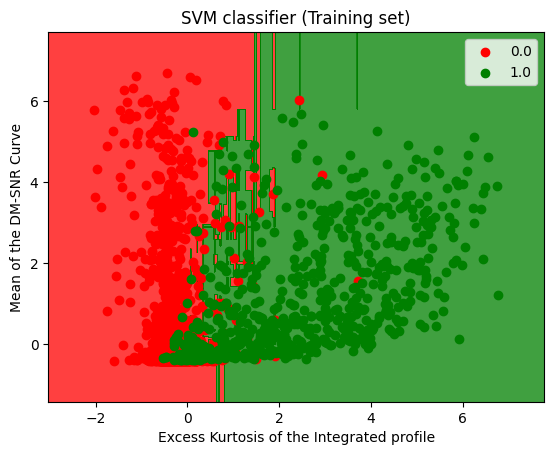

In [14]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = prathamesh_np.meshgrid(prathamesh_np.arange(start = x_set[:, 0].min() - 1, stop =
x_set[:, 0].max() + 1, step =0.01),
prathamesh_np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() +
1, step = 0.01))
prathamesh_plt.contourf(x1, x2, prathamesh_classifier.predict(prathamesh_np.array([x1.ravel(),
x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'green')))
prathamesh_plt.xlim(x1.min(), x1.max())
prathamesh_plt.ylim(x2.min(), x2.max())
for i, j in enumerate(prathamesh_np.unique(y_set)):
  prathamesh_plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

prathamesh_plt.title('SVM classifier (Training set)')
prathamesh_plt.xlabel('Excess Kurtosis of the Integrated profile')
prathamesh_plt.ylabel('Mean of the DM-SNR Curve')
prathamesh_plt.legend()
prathamesh_plt.show()

Visualising the Test set results:

C:\Users\paxyi\AppData\Local\Temp\ipykernel_29016\1895156377.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


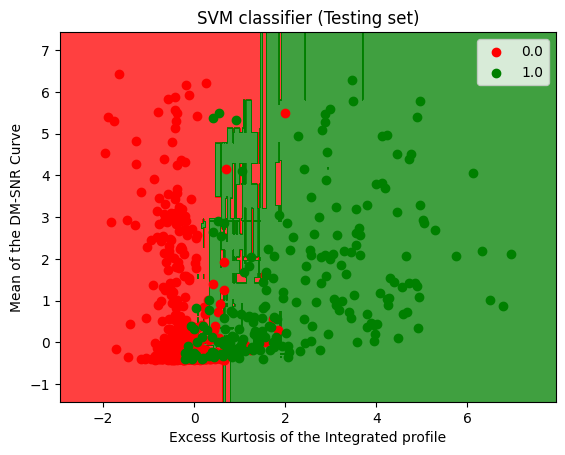

In [15]:
#Visualizing the test set result:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = prathamesh_np.meshgrid(prathamesh_np.arange(start = x_set[:, 0].min() - 1, stop =
x_set[:, 0].max() + 1, step =0.01),
prathamesh_np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() +
1, step = 0.01))
prathamesh_plt.contourf(x1, x2, prathamesh_classifier.predict(prathamesh_np.array([x1.ravel(),
x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'green')))
prathamesh_plt.xlim(x1.min(), x1.max())
prathamesh_plt.ylim(x2.min(), x2.max())
for i, j in enumerate(prathamesh_np.unique(y_set)):
  prathamesh_plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
c = ListedColormap(('red', 'green'))(i), label = j)

prathamesh_plt.title('SVM classifier (Testing set)')
prathamesh_plt.xlabel('Excess Kurtosis of the Integrated profile')
prathamesh_plt.ylabel('Mean of the DM-SNR Curve')
prathamesh_plt.legend()
prathamesh_plt.show()

Getting accuracy score:

In [16]:
accuracy_score(y_test,y_pred)

0.9698145752479517

Plotting the first five estimator trees: 

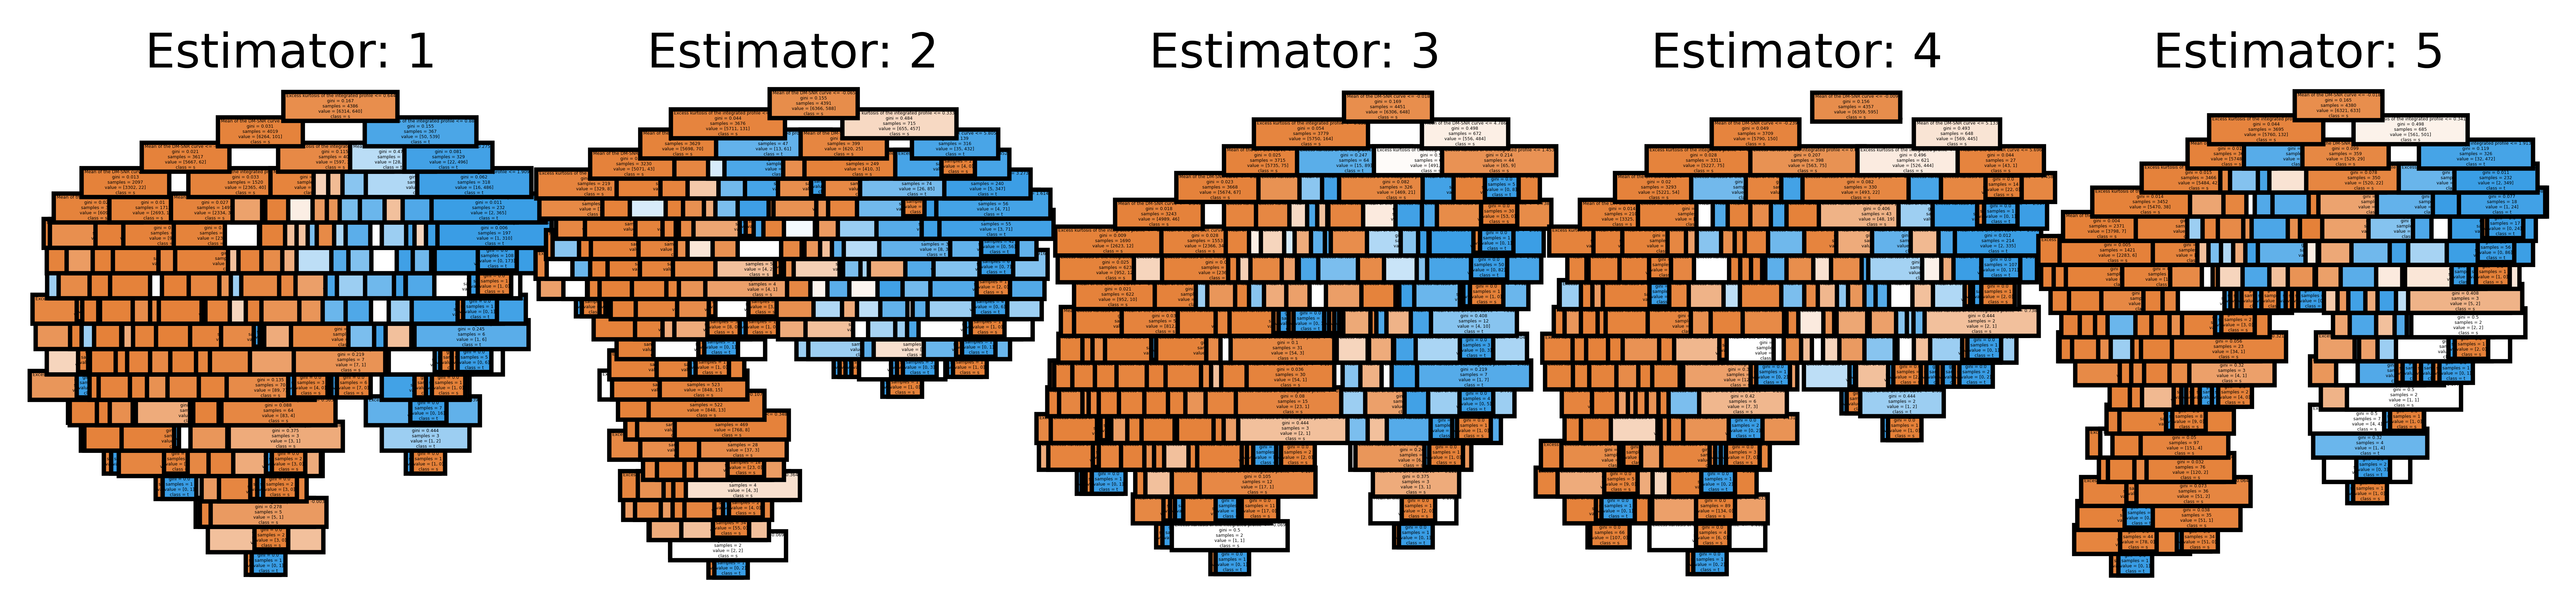

In [17]:
from sklearn import tree
fig, axes = prathamesh_plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
  tree.plot_tree(prathamesh_classifier.estimators_[index],feature_names= x.columns, class_names= 'status',filled = True,ax = axes[index]) 
  axes[index].set_title('Estimator: ' + str(index+1), fontsize = 11)
fig.savefig('rf_5trees.png')

## Conclusion:


We have successfully implemented Bagging in  Random Forest Algorithm.
